In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [530]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from collections import Counter
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
import feather

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, TruncatedSVD
from scipy.cluster import hierarchy as hc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import *
#Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from imblearn.ensemble import *

In [612]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [613]:
# df_raw = pd.read_csv("C:/Kaggle/train.csv",low_memory=False,parse_dates=['origination_date','first_payment_date'])

In [614]:
df_raw = feather.read_dataframe("C:/Kaggle/tmp/loan-raw")

In [615]:
df_raw1 = df_raw[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']]

In [616]:

df_raw1.loc[:,'Total'] = df_raw1.sum(axis=1)/11

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


    So here we do some Feature Engineering and find out that mostly the delequincy is dependent of the m12,m11,m10 

In [617]:
df_raw1.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,Total
0,0,0,0,0,0,0,1,0,0,0,0,0,0.090909
1,0,0,0,0,0,0,0,0,0,0,1,0,0.090909
2,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
3,0,0,0,0,0,0,0,0,1,1,1,1,0.363636
4,0,1,2,3,4,5,6,7,8,9,10,11,6.000000


In [618]:
df_raw['Total'] = df_raw1['Total']

In [619]:
df_raw['Very_Short_Term'] = df_raw['loan_term'].map(lambda t: 1 if t<=60 else 0)
df_raw['Short_Term'] = df_raw['loan_term'].map(lambda t: 1 if t>60 and t<180 else 0)
df_raw['Long_Term'] = df_raw['loan_term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
df_raw['Very_Loan_Term'] = df_raw['loan_term'].map(lambda t: 1 if t>300 else 0)
df_raw.drop('loan_term', axis=1, inplace=True)

In [620]:
df_raw.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,first_payment_Is_quarter_end,first_payment_Is_quarter_start,first_payment_Is_year_end,first_payment_Is_year_start,first_payment_Elapsed,Total,Very_Short_Term,Short_Term,Long_Term,Very_Loan_Term
0,268055008619,2,18,4.250,214000,95,1.0,22.0,694.0,2,...,False,False,False,False,1335830400,0.090909,0,0,0,1
1,672831657627,1,15,4.875,144000,72,1.0,44.0,697.0,1,...,False,False,False,False,1330560000,0.090909,0,0,0,1
2,742515242108,2,17,3.250,366000,49,1.0,33.0,780.0,1,...,False,False,False,False,1330560000,0.000000,0,0,1,0
3,601385667462,0,8,4.750,135000,46,2.0,44.0,633.0,1,...,False,True,False,False,1333238400,0.363636,0,0,0,1
4,273870029961,0,8,4.750,124000,80,1.0,43.0,681.0,2,...,False,True,False,False,1333238400,6.000000,0,0,0,1


In [621]:
# colms =  [ ]
# for cols in df_raw.columns[:27]:
#     colms.append(cols)

In [622]:
# print(colms)

In [623]:
# df_raw = df_raw[colms]

In [624]:
# df_raw['Total'] = df_raw1['Total']

In [625]:
# def feature_scaling(df):
#     df -= df.min()
#     df /= df.max()
#     return df

In [626]:
# df_raw['unpaid_principal_bal']=feature_scaling(df_raw['unpaid_principal_bal'])
# df_raw['loan_to_value'] = feature_scaling(df_raw['loan_to_value'])
# df_raw['debt_to_income_ratio'] =feature_scaling(df_raw['debt_to_income_ratio'])
# df_raw['borrower_credit_score'] = feature_scaling(df_raw['borrower_credit_score'])

In [627]:
df_raw.drop('Total',axis=1,inplace=True)

In [628]:
# ros = RandomOverSampler(sampling_strategy='minority')
smote = SMOTE()

In [629]:
y = df_raw['m13'] 
X = df_raw

In [630]:
X.drop(['m13','loan_id'],axis=1,inplace=True)

In [631]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X
                                                                                                   ,y
                                                                                                   ,test_size = 0.2
                                                                                                   ,random_state = 8)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  92846
Number transactions test dataset:  23212
Total number of transactions:  116058


In [632]:
X_train_resampled, y_train_resampled=smote.fit_resample(X_train_undersample,y_train_undersample)

In [633]:
Counter(y_train_resampled)

Counter({1: 92339, 0: 92339})

In [634]:
set_rf_samples(20000)

Training the Naive RandomForest to check the results and it gave a very decent scpre

In [635]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(X_train_resampled,y_train_resampled) 
print(f1_score(y_test_undersample,m.predict(X_test_undersample))) 
print(classification_report(y_test_undersample,m.predict(X_test_undersample)))
print(recall_score(y_test_undersample,m.predict(X_test_undersample)))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4580152671755725
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23083
           1       0.45      0.47      0.46       129

    accuracy                           0.99     23212
   macro avg       0.72      0.73      0.73     23212
weighted avg       0.99      0.99      0.99     23212

0.46511627906976744


In [638]:
fi = rf_feat_importance(m,df_rand_resample); fi[:10]

,cols,imp
23,f23,0.244969
7,f7,0.097116
19,f19,0.069932
22,f22,0.066882
20,f20,0.061218
5,f5,0.054370
8,f8,0.049664
10,f10,0.048261
17,f17,0.048013
53,f53,0.038415


In [639]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

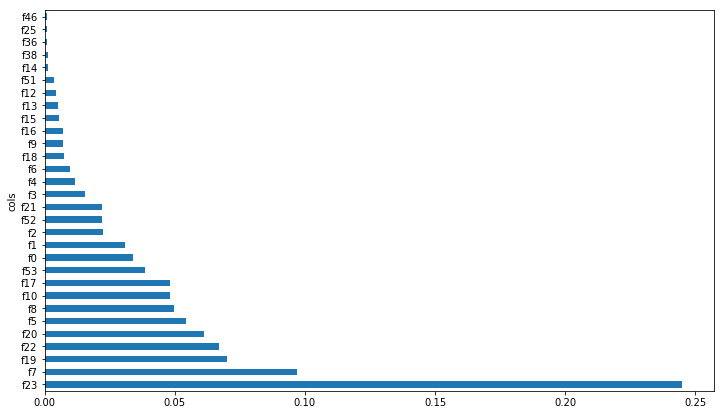

In [640]:
plot_fi(fi[:30]);

In [641]:
to_keep = fi[fi.imp>0.002].cols;len(to_keep)

25

Keeping Features with Random forest feature importance and also we know we dont need many features

In [661]:
params = [140]
for x in params:
    m = RandomForestClassifier(n_jobs=-1,min_samples_split=3,min_samples_leaf=7,max_features='sqrt',n_estimators=x)
    m.fit(df_keep,y_train_resampled)
    print(f1_score(y_test_undersample,m.predict(df_test_keep)))
    print(classification_report(y_test_undersample,m.predict(df_test_keep)))
    print(recall_score(y_test_undersample,m.predict(df_test_keep)))

0.5108225108225107
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23083
           1       0.58      0.46      0.51       129

    accuracy                           1.00     23212
   macro avg       0.79      0.73      0.75     23212
weighted avg       0.99      1.00      0.99     23212

0.4573643410852713


In [593]:
fi = rf_feat_importance(m,df_keep);fi[:10]

,cols,imp
1,f50,0.303594
3,f23,0.161932
2,f22,0.062067
0,f20,0.050292
4,f7,0.047977
11,f21,0.046934
5,f8,0.041223
6,f10,0.040358
8,f5,0.037603
9,f19,0.032119


using GBM helps a bit

In [257]:
# params = [0.1]
# for x in params:
# p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,200,300,400,500]}
# tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10),param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5) 

m = GradientBoostingClassifier()
m.fit(df_keep,y_train_resampled)
# print(recall_score(y_test_undersample,m.predict(df_test_keep)))
print(f1_score(y_test_undersample,m.predict(df_test_keep)))
print(classification_report(y_test_undersample,m.predict(df_test_keep)))

0.3987538940809969
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23083
           1       0.33      0.50      0.40       129

    accuracy                           0.99     23212
   macro avg       0.67      0.75      0.70     23212
weighted avg       0.99      0.99      0.99     23212



Text(0, 0.5, 'Feature Importance Score')

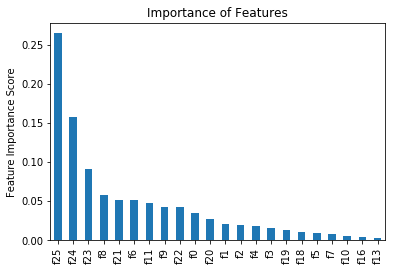

In [240]:
predictors=list(df_keep)
feat_imp = pd.Series(m.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [ ]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,200,300,400,500],'max_depth':[2,3,4,5,6,7],'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10),param_grid = p_test3, scoring='f1',n_jobs=4,iid=False, cv=3)
tuning.fit(df_keep,y_train_resampled)
tuning.best_params_,tuning.best_score_

In [63]:
preds = tuning.predict(df_test_keep)

In [71]:
print(classification_report(y_test_undersample,preds))
print(f1_score(y_test_undersample,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23083
           1       0.63      0.39      0.48       129

    accuracy                           1.00     23212
   macro avg       0.81      0.69      0.74     23212
weighted avg       0.99      1.00      0.99     23212

0.4807692307692308


Text(0, 0.5, 'Feature Importance Score')

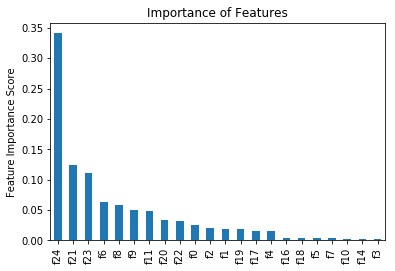

In [85]:
predictors=list(df_keep)
feat_imp = pd.Series(m.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [94]:
m = GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=2, min_samples_split=10, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
# tuning.fit(df_keep,y_train_resampled))
m.fit(df_keep,y_train_resampled)
# print(recall_score(y_test_undersample,m.predict(df_test_keep)))
print(f1_score(y_test_undersample,m.predict(df_test_keep)))
print(classification_report(y_test_undersample,m.predict(df_test_keep)))

0.49350649350649345
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23083
           1       0.56      0.44      0.49       129

    accuracy                           0.99     23212
   macro avg       0.78      0.72      0.75     23212
weighted avg       0.99      0.99      0.99     23212



In [ ]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')#msp(6,10),maxd=[2,3],minsl=
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

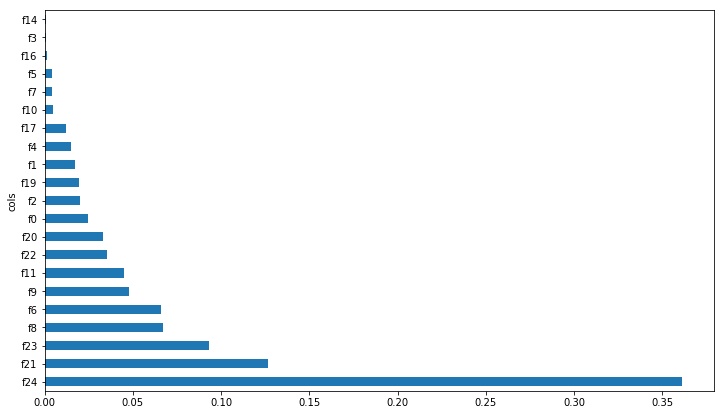

In [95]:
plot_fi(rf_feat_importance(m, df_keep)[:21]);

In [441]:
fi = rf_feat_importance(m, df_keep); fi[:10]

,cols,imp
0,f50,0.279578
1,f23,0.135270
10,f22,0.069609
2,f7,0.066931
3,f2,0.062164
5,f8,0.054606
11,f20,0.037793
7,f4,0.036528
8,f53,0.036429
6,f10,0.035688


In [662]:
cf = confusion_matrix(y_test_undersample,m.predict(df_test_keep))

In [663]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

Recall metric in the testing dataset:  59.84285714285714


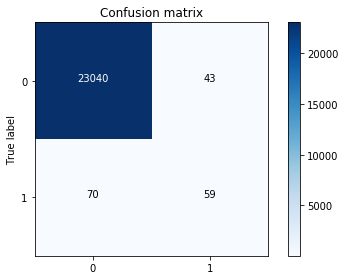

In [664]:
print("Recall metric in the testing dataset: ", cf[1,1]/cf[1,0]+cf[1,1])

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cf
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [676]:
df_test = feather.read_dataframe("C:/Kaggle/tmp/loan-test")

In [675]:
df_test = df_test[colms[:26]]

In [677]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,35866.0,1.793350e+04,10353.766714,1.000000e+00,8.967250e+03,1.793350e+04,2.689975e+04,3.586600e+04
source,35866.0,5.757821e-01,0.703668,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
financial_institution,35866.0,6.481347e+00,4.472392,0.000000e+00,1.000000e+00,8.000000e+00,8.000000e+00,1.800000e+01
interest_rate,35866.0,3.872850e+00,0.460537,2.375000e+00,3.500000e+00,3.875000e+00,4.125000e+00,6.625000e+00
unpaid_principal_bal,35866.0,2.077648e+05,114561.745828,1.500000e+04,1.190000e+05,1.820000e+05,2.780000e+05,8.020000e+05
loan_term,35866.0,2.931301e+02,89.298799,6.000000e+01,1.800000e+02,3.600000e+02,3.600000e+02,3.600000e+02
loan_to_value,35866.0,6.738833e+01,17.246741,5.000000e+00,5.700000e+01,7.200000e+01,8.000000e+01,9.700000e+01
number_of_borrowers,35866.0,1.596805e+00,0.490546,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
debt_to_income_ratio,35866.0,3.076287e+01,9.726146,1.000000e+00,2.300000e+01,3.100000e+01,3.900000e+01,5.500000e+01
borrower_credit_score,35866.0,7.699265e+02,41.779664,0.000000e+00,7.510000e+02,7.820000e+02,7.990000e+02,8.390000e+02


In [678]:
df_raw2 = df_test[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']]

In [600]:
df_test.loc[:,'Total'] = df_raw2.sum(axis=1)/11

In [679]:
df_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,...,origination_Day,origination_Dayofweek,origination_Dayofyear,origination_Is_month_end,origination_Is_month_start,origination_Is_quarter_end,origination_Is_quarter_start,origination_Is_year_end,origination_Is_year_start,origination_Elapsed
0,1,1,1,3.875,417000,360,75,1,20,790,...,2,0,2,False,False,False,False,False,False,1325462400
1,2,0,8,4.500,113000,360,80,2,33,793,...,2,0,2,False,False,False,False,False,False,1325462400
2,3,1,8,4.500,72000,360,75,1,34,710,...,1,6,1,False,True,False,True,False,True,1325376000
3,4,0,6,4.125,123000,180,41,2,24,798,...,2,0,2,False,False,False,False,False,False,1325462400
4,5,0,1,3.250,166000,180,53,2,12,767,...,2,0,2,False,False,False,False,False,False,1325462400


In [680]:
df_test['Very_Short_Term'] = df_test['loan_term'].map(lambda t: 1 if t<=60 else 0)
df_test['Short_Term'] = df_test['loan_term'].map(lambda t: 1 if t>60 and t<180 else 0)
df_test['Long_Term'] = df_test['loan_term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
df_test['Very_Loan_Term'] = df_test['loan_term'].map(lambda t: 1 if t>300 else 0)
df_test.drop('loan_term', axis=1, inplace=True)

In [681]:
df_test2 = pd.DataFrame(data=df_test.values[0:,0:],index=[i for i in range(df_test.values.shape[0])],
          columns=['f'+str(i) for i in range(df_test.values.shape[1])])

In [682]:
train_cols = []
for c in df_keep.columns:
    train_cols.append(c)

In [683]:
df_test1 = df_test2[train_cols]

In [684]:
df_test1.head()

,f23,f7,f19,f22,f20,f5,f8,f10,f17,f53,...,f3,f4,f6,f18,f9,f16,f15,f13,f12,f51
0,0,20,0,0,0,75,790,0,0,0,...,3.875,417000,1,0,0,0,0,0,0,0
1,0,33,0,0,0,80,793,0,0,0,...,4.5,113000,2,0,2,0,0,0,0,0
2,0,34,0,0,0,75,710,0,0,0,...,4.5,72000,1,0,2,0,0,0,0,0
3,0,24,0,0,0,41,798,0,0,1,...,4.125,123000,2,0,0,0,0,0,0,0
4,0,12,0,0,0,53,767,0,0,1,...,3.25,166000,2,0,0,0,0,0,0,0


In [685]:
df_test2 = df_test.drop('loan_id',inplace=False,axis=1)

In [686]:
y_test = m.predict(df_test1)
dic = {'m13':y_test}
df_sub = pd.DataFrame(data=dic)

In [687]:
df_sub = pd.concat([df_test["loan_id"],df_sub],axis=1)

In [688]:
df_sub.m13.value_counts()

0    35732
1      134
Name: m13, dtype: int64

In [611]:
df_sub.to_csv("C:/Kaggle/sub_test.csv",index=False)

So a untuned GBM gave me a 578 rank on leaderboard very bad performance but i learned about CrossVal,Feature Engineering and better tuning with the features i created i could have gotten Top 20 With Knowledege of Fine Tuning and CrossValidation